In [ ]:
# Por inconvenientes con las sesiones del colab, tuve que trabajar directamente en mi computador todo el ejercicio.

from shutil import copyfile
import os

# drive_path = '/media/camilo/Data/udea-specializa0tion/'
drive_path = '/media/camilo/Data/udea-specialization/monografia'
base_path = os.path.join(drive_path, 'final')
iter_path = os.path.join(base_path, 'iter2')
data_path = os.path.join(iter_path, 'data')

if not os.path.exists(data_path):
    os.makedirs(data_path)

# drive.mount(drive_path, force_remount=True)
%cd $data_path

/media/camilo/centos_home/culian/actsell_innref_com/Camilo/final/iter1/data


In [ ]:
#Data management Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
import random
import shutil

# Data Modeling Libraries
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Activation, Dropout, Flatten, Dense, Input, UpSampling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


%matplotlib inline

In [ ]:
# Ruta de la carpeta raiz
root_path = data_path

# Ruta de la carpeta artists
artists_root_path = root_path + '/images/images'

# Se obtiene la lista de carpetas
artists = os.listdir(artists_root_path)

# Arreglo para la lista de rutas de las pinturas de cada artista
folders = []

# Se obtienen los paths a cada una de las carpetas de los artistas
for artist in artists:
    folder  = os.path.join(artists_root_path, artist)
    folders.append(folder) 
    
# Arreglo para almacenar las rutas de las pinturas    
file_paths = []

# Arreglo de la lista de artistas (columna de interes)
labels = []

# Arreglo de la lista de nombres de obras
painting_names = []

# Se cargan los datos
for f, a in zip(folders, artists):
    folder_item = os.listdir(f)
    for f_i in folder_item:
        f_path = os.path.join (f, f_i)
        file_paths.append(f_path)
        labels.append(a.replace("_"," ").replace("u╠ê","ü"))
        painting_names.append(f_i)
        
# Se guardan los datos obtenidos en un dataframe
dataFrame = pd.DataFrame(list(zip(file_paths, painting_names, labels)), columns =['path', 'paint', 'name'])
dataFrame = pd.merge(dataFrame, df[["name","genre"]], on='name')
dataFrame


,path,paint,name,genre
0,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_1.jpg,Albrecht Dürer,Northern Renaissance
1,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_10.jpg,Albrecht Dürer,Northern Renaissance
2,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_100.jpg,Albrecht Dürer,Northern Renaissance
3,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_101.jpg,Albrecht Dürer,Northern Renaissance
4,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_102.jpg,Albrecht Dürer,Northern Renaissance
5,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_103.jpg,Albrecht Dürer,Northern Renaissance
6,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_104.jpg,Albrecht Dürer,Northern Renaissance
7,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_105.jpg,Albrecht Dürer,Northern Renaissance
8,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_106.jpg,Albrecht Dürer,Northern Renaissance
9,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_107.jpg,Albrecht Dürer,Northern Renaissance


In [ ]:
X, y = dataFrame, dataFrame['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 101)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.2, random_state = 101)

In [ ]:
# Ruta de la carpeta raiz para train
train_set_root_path = os.path.join(root_path,'training_set')

# Ruta de la carpeta raiz para train
val_set_root_path = os.path.join(root_path,'val_set')

# Ruta de la carpeta raiz para test
test_set_root_path = os.path.join(root_path,'test_set')

In [ ]:
# Se borran las carpetas training_set, val_set y test_set si existen
try:
   shutil.rmtree(train_set_root_path)
except OSError as e:
   print("Error: %s - %s." % (e.filename, e.strerror))
    
try:
   shutil.rmtree(val_set_root_path)
except OSError as e:
   print("Error: %s - %s." % (e.filename, e.strerror))
    
try:
   shutil.rmtree(test_set_root_path)
except OSError as e:
   print("Error: %s - %s." % (e.filename, e.strerror))

Error: /media/camilo/centos_home/culian/actsell_innref_com/Camilo/final/iter1/data/training_set - No such file or directory.
Error: /media/camilo/centos_home/culian/actsell_innref_com/Camilo/final/iter1/data/val_set - No such file or directory.
Error: /media/camilo/centos_home/culian/actsell_innref_com/Camilo/final/iter1/data/test_set - No such file or directory.


In [ ]:
# Se obtiene la lista de carpetas de los artistas
genres = list(dataFrame["genre"].unique())

# Se crean las carpetas en train, val y test
for genre in genres:
   ruta_train = os.path.join(train_set_root_path, genre)
   os.makedirs(ruta_train) 

   ruta_val = os.path.join(val_set_root_path, genre)
   os.makedirs(ruta_val) 

   ruta_test = os.path.join(test_set_root_path, genre)
   os.makedirs(ruta_test)    

In [2]:
def move_images(X_dataset, root_path_dataset):
    for path, paint, genre in zip(X_dataset['path'], X_dataset['paint'], X_dataset['genre']):
        # print(path, ' ', paint, ' ', artist)
        original = path
        target = os.path.join(root_path_dataset,genre,paint)
        print(f"{original} -> {target}")
        shutil.move(original, target)        

move_images(X_train, train_set_root_path)
move_images(X_val, val_set_root_path)
move_images(X_test, test_set_root_path)

NameError: ignored

In [ ]:
def get_class_weight(paintings):
    total_paintings = 0
    for number in paintings[1]:
        total_paintings += number 
    
    class_weight = {}
    
    index = 0
    for paints_number in paintings[1]:
        class_weight[index] = (paints_number / total_paintings)
        index += 1
        
    return class_weight


categories = np.unique(y_train, return_counts=True)
artists_weight = get_class_weight(categories)

In [ ]:
training_generator = ImageDataGenerator(rescale=1./255, rotation_range=7, horizontal_flip=True, zoom_range=0.2)

train_dataset = training_generator.flow_from_directory(train_set_root_path,
                                                        target_size = (224, 224),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

val_generator = ImageDataGenerator(rescale=1./255)
val_dataset = val_generator.flow_from_directory(val_set_root_path,
                                                 target_size = (224, 224),
                                                 batch_size = 1,
                                                 class_mode = 'categorical',
                                                 shuffle = False)
# test_set_root_path

Found 5615 images belonging to 21 classes.
Found 1404 images belonging to 21 classes.


In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(test_set_root_path,
                                                 target_size = (224, 224),
                                                 batch_size = 1,
                                                 class_mode = 'categorical',
                                                 shuffle = False)

Found 1755 images belonging to 21 classes.


### Modelo 1

ResNet152 V2 (No entrenable) + Avg Pooling + 3 Capas densas

15 Epochs


In [ ]:
base_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, 
                                               input_tensor = Input(shape = (224, 224, 3)))

for layer in base_model.layers:
  layer.trainable = False

head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(units = 5000, activation='relu')(head_model)
head_model = Dropout(rate = 0.5)(head_model)
head_model = Dense(units = 3000, activation='relu')(head_model)
head_model = Dropout(rate = 0.5)(head_model)
head_model = Dense(21, activation='softmax')(head_model)

model = Model(inputs = base_model.input, outputs = head_model)

early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1, mode='min', baseline=None, restore_best_weights=False)
callbacks = [early_stopping]

model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
history = model.fit(train_dataset, epochs=15, validation_data=val_dataset, callbacks=callbacks, class_weight=artists_weight)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
351/351 [==============================] - ETA: 0s - loss: 0.1714 - accuracy: 0.3286WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4ef828e730> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [ ]:
model_json = model.to_json()
with open(os.path.join(root_path,'model_vanilla.json'),'w') as json_file:
  json_file.write(model_json)

from keras.models import save_model
model_saved = save_model(model, 'weights_vanilla.hdf5')

/home/camilo/.local/lib/python3.7/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


### Modelo 2

ResNet152 V2 (Primeras 450 capas No entrenables) + Avg Pooling + 3 Capas densas

15 Epochs


In [ ]:
base_model.trainable = True

fine_tuning_at = 450

for layer in base_model.layers[:fine_tuning_at]:
  layer.trainable = False

model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=15, validation_data=(val_dataset), callbacks=callbacks, class_weight=artists_weight)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
351/351 [==============================] - ETA: 0s - loss: 0.1822 - accuracy: 0.2322WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4ec37aebf8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [ ]:
model_json = model.to_json()
with open(os.path.join(root_path,'model_finetuning_450.json'),'w') as json_file:
  json_file.write(model_json)

model_saved = save_model(model, 'weights_finetuning_450.hdf5')

### Modelo 3

ResNet152 V2 (Unicamente últimas 30 capas entrenables) + Avg Pooling + 3 Capas densas

15 Epochs


In [ ]:
base_model.trainable = False

fine_tuning_last = 30 

for layer in base_model.layers[-fine_tuning_last:]:
  layer.trainable = True

model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=15, validation_data=(val_dataset), callbacks=callbacks, class_weight=artists_weight)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
351/351 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.5630WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4ef8603400> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [ ]:
model_json = model.to_json()
with open(os.path.join(root_path,'model_otherfinetuning_450.json'),'w') as json_file:
  json_file.write(model_json)

model_saved = save_model(model, 'weights_otherfinetuning_450.hdf5')

### Modelo 4

ResNet152 V2 (Completamente entrenable) + Avg Pooling + 3 Capas densas

15 Epochs


In [ ]:
base_model.trainable = True

model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=15, validation_data=(val_dataset), callbacks=callbacks, class_weight=artists_weight)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
351/351 [==============================] - ETA: 0s - loss: 0.1884 - accuracy: 0.2328WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4ce1c20b70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [ ]:
model_json = model.to_json()
with open(os.path.join(root_path,'model_completetuning.json'),'w') as json_file:
  json_file.write(model_json)

model_saved = save_model(model, 'model_completetuning.hdf5')

## Mas Epochs!

### Modelo 1

ResNet152 V2 (No entrenable) + Avg Pooling + 3 Capas densas

30 Epochs


In [ ]:
base_model.trainable = False
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=callbacks, class_weight=artists_weight)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
351/351 [==============================] - ETA: 0s - loss: 0.1523 - accuracy: 0.3015WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4ec0404ea0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [ ]:
model_json = model.to_json()
with open(os.path.join(root_path,'model_vanilla.json'),'w') as json_file:
  json_file.write(model_json)

from keras.models import save_model
model_saved = save_model(model, 'weights_vanilla.hdf5')

### Modelo 2

ResNet152 V2 (Primeras 450 capas no entrenables) + Avg Pooling + 3 Capas densas

30 Epochs


In [ ]:
base_model.trainable = True

fine_tuning_at = 450

for layer in base_model.layers[:fine_tuning_at]:
  layer.trainable = False

model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=callbacks, class_weight=artists_weight)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
351/351 [==============================] - ETA: 0s - loss: 0.1389 - accuracy: 0.3416WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4ca8a8fc80> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [ ]:
model_json = model.to_json()
with open(os.path.join(root_path,'model_finetuning_450.json'),'w') as json_file:
  json_file.write(model_json)

model_saved = save_model(model, 'weights_finetuning_450.hdf5')

### Modelo 3

ResNet152 V2 (Ultimas 30 capas entrenables) + Avg Pooling + 3 Capas densas

30 Epochs


In [ ]:
base_model.trainable = False

fine_tuning_last = 30 

for layer in base_model.layers[-fine_tuning_last:]:
  layer.trainable = True

model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=callbacks, class_weight=artists_weight)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
351/351 [==============================] - ETA: 0s - loss: 0.1012 - accuracy: 0.4748WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4c8e6c2b70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [ ]:
model_json = model.to_json()
with open(os.path.join(root_path,'model_finetuning_last30.json'),'w') as json_file:
  json_file.write(model_json)

model_saved = save_model(model, 'weights_finetuning_last30.hdf5')

## Utilities

Some utililities for improving visualization on next models

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

clases = list(test_dataset.class_indices.keys())
abr_clases = ["".join([(w[:3]) for w in name.split()]) for name in clases]
y_test = test_dataset.classes




# Modelos

De aquí en adelante están los modelos entrenados con más epochs, y con gráficas que permiten comparar la evolución a través de los epochs, y la matriz de confusión del ejercicio de clasificación del conjunto de test, esto con el fin de ubicar si hay algunas clases con mayor predilección de clasificación.

In [ ]:
base_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, 
                                               input_tensor = Input(shape = (224, 224, 3)))

for layer in base_model.layers:
  layer.trainable = False

head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(units = 2000, activation='relu')(head_model)
head_model = Dropout(rate = 0.5)(head_model)
head_model = Dense(units = 500, activation='relu')(head_model)
head_model = Dropout(rate = 0.5)(head_model)
head_model = Dense(21, activation='softmax')(head_model)

In [ ]:
new_model = tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
new_model.trainable = True
for layer in new_model.layers[-20:]:
  layer.trainable = False

new_head_model = new_model.output
#new_head_model = GlobalAveragePooling2D()(head_model)
new_head_model = Dense(units = 2000, activation='relu')(new_head_model)
new_head_model = Dropout(rate = 0.3)(new_head_model)
new_head_model = Dense(units = 500, activation='relu')(new_head_model)
new_head_model = Dropout(rate = 0.5)(new_head_model)
new_head_model = Dense(21, activation='softmax')(new_head_model)


vgg_model = Model(inputs = new_model.input, outputs = new_head_model)

early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min', baseline=None, restore_best_weights=False)
callbacks = [early_stopping]

vgg_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
print(vgg_model.summary())

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
history_vgg = vgg_model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks, class_weight=artists_weight)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
351/351 [==============================] - ETA: 0s - loss: 0.1892 - accuracy: 0.1865WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4c8d13fd90> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

351/351 [==============================] - 93s 265ms/step - loss: 0.1099 - accuracy: 0.4470 - val_loss: 2.1229 - val_accuracy: 0.4195
Epoch 45/50
351/351 [==============================] - 93s 265ms/step - loss: 0.1100 - accuracy: 0.4502 - val_loss: 2.1124 - val_accuracy: 0.4224
Epoch 46/50
351/351 [==============================] - 93s 266ms/step - loss: 0.1096 - accuracy: 0.4536 - val_loss: 2.0355 - val_accuracy: 0.4473
Epoch 47/50
351/351 [==============================] - 94s 266ms/step - loss: 0.1098 - accuracy: 0.4508 - val_loss: 2.0547 - val_accuracy: 0.4338
Epoch 48/50
351/351 [==============================] - 93s 265ms/step - loss: 0.1085 - accuracy: 0.4581 - val_loss: 2.0084 - val_accuracy: 0.4330
Epoch 49/50
351/351 [==============================] - 93s 265ms/step - loss: 0.1069 - accuracy: 0.4593 - val_loss: 2.0425 - val_accuracy: 0.4359
Epoch 50/50
351/351 [==============================] - 93s 266ms/step - loss: 0.1067 - accuracy: 0.4579 - val_loss: 2.0892 - val_accurac

Text(0.5, 1.0, 'Accuracy through Epochs')

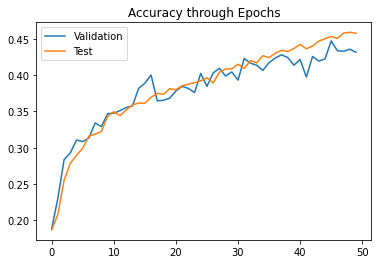

In [ ]:

y11 = history_vgg.history["val_accuracy"]
y12 = history_vgg.history["accuracy"]
x1 = range(len(y11))

plt.plot(x1, y11)
plt.plot(x1, y12)

plt.legend(["Validation", "Test"])
plt.title("Accuracy through Epochs")


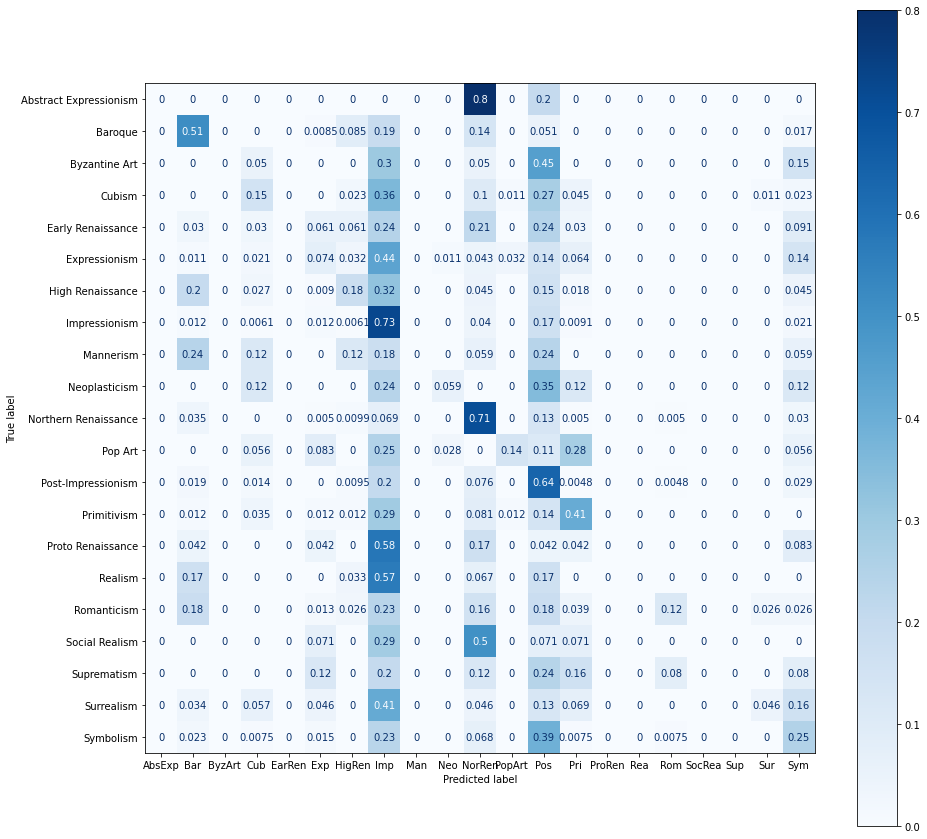

In [ ]:
y_pred = history_vgg.model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis = 1)

fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clases,ax=ax, cmap='Blues', normalize="true")
ax.xaxis.set_ticklabels(abr_clases)
plt.show()




In [ ]:
print("--------------------------------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------------------------


In [ ]:
base_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, 
                                               input_tensor = Input(shape = (224, 224, 3)))

for layer in base_model.layers:
  layer.trainable = False

head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(units = 5000, activation='relu')(head_model)
head_model = Dropout(rate = 0.5)(head_model)
head_model = Dense(units = 3000, activation='relu')(head_model)
head_model = Dropout(rate = 0.5)(head_model)
head_model = Dense(21, activation='softmax')(head_model)

model = Model(inputs = base_model.input, outputs = head_model)

early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min', baseline=None, restore_best_weights=False)
callbacks = [early_stopping]

model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
history2 = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks, class_weight=artists_weight)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
351/351 [==============================] - ETA: 0s - loss: 0.1709 - accuracy: 0.3240WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4c1ff718c8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

Epoch 44/50
351/351 [==============================] - 105s 298ms/step - loss: 0.0616 - accuracy: 0.7083 - val_loss: 1.4974 - val_accuracy: 0.6168
Epoch 00044: early stopping


Text(0.5, 1.0, 'Accuracy through Epochs')

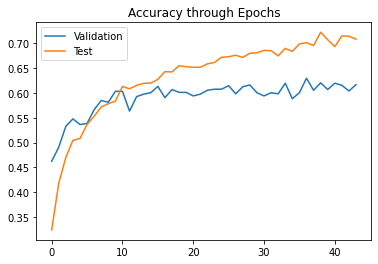

In [ ]:

y11 = history2.history["val_accuracy"]
y12 = history2.history["accuracy"]
x1 = range(len(y11))

plt.plot(x1, y11)
plt.plot(x1, y12)

plt.legend(["Validation", "Test"])
plt.title("Accuracy through Epochs")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


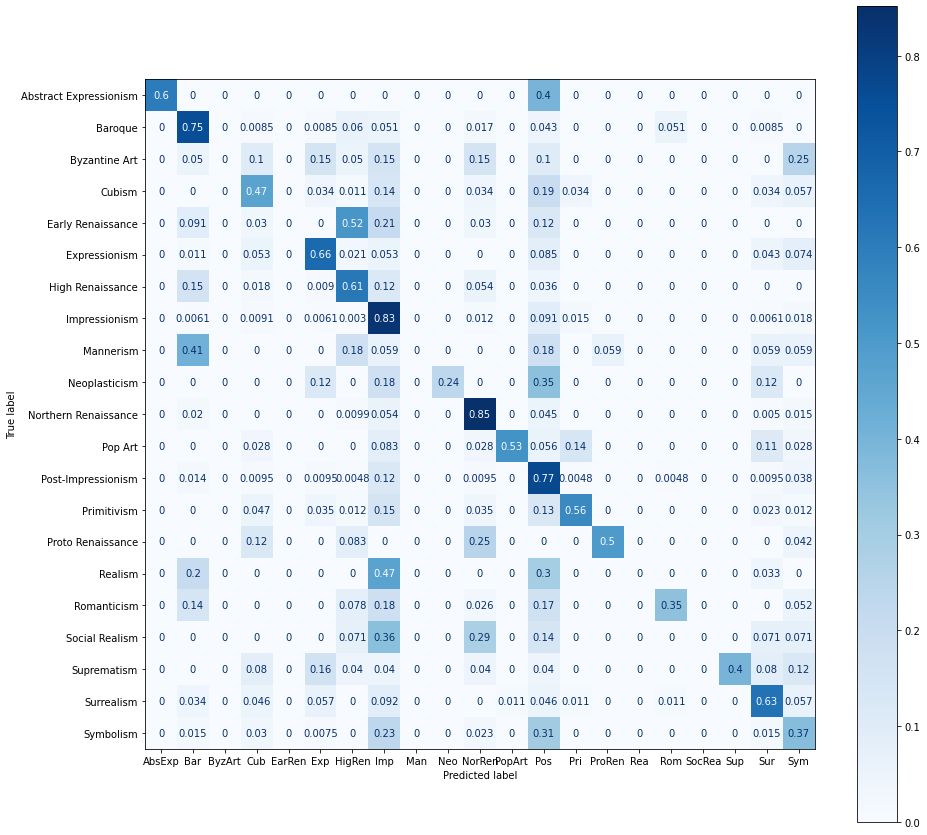

In [ ]:
y_pred = history2.model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis = 1)

fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clases,ax=ax, cmap='Blues', normalize="true")
ax.xaxis.set_ticklabels(abr_clases)
plt.show()




In [ ]:
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks, class_weight=artists_weight)

Epoch 1/50
351/351 [==============================] - 105s 298ms/step - loss: 0.0598 - accuracy: 0.7209 - val_loss: 1.5455 - val_accuracy: 0.6254
Epoch 2/50
351/351 [==============================] - 105s 298ms/step - loss: 0.0566 - accuracy: 0.7309 - val_loss: 1.6103 - val_accuracy: 0.6033
Epoch 3/50
351/351 [==============================] - 104s 298ms/step - loss: 0.0570 - accuracy: 0.7362 - val_loss: 1.5844 - val_accuracy: 0.6368
Epoch 4/50
351/351 [==============================] - 104s 297ms/step - loss: 0.0617 - accuracy: 0.7229 - val_loss: 1.5205 - val_accuracy: 0.6175
Epoch 5/50
351/351 [==============================] - 105s 298ms/step - loss: 0.0570 - accuracy: 0.7355 - val_loss: 1.5670 - val_accuracy: 0.6225
Epoch 6/50
351/351 [==============================] - 105s 298ms/step - loss: 0.0563 - accuracy: 0.7362 - val_loss: 1.5436 - val_accuracy: 0.6189
Epoch 7/50
351/351 [==============================] - 105s 298ms/step - loss: 0.0577 - accuracy: 0.7377 - val_loss: 1.5636 -

Text(0.5, 1.0, 'Accuracy through Epochs')

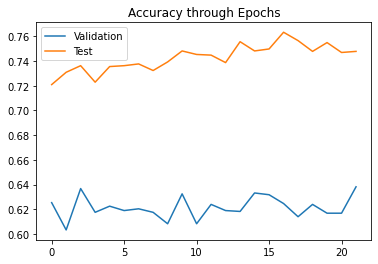

In [ ]:

y11 = history.history["val_accuracy"]
y12 = history.history["accuracy"]
x1 = range(len(y11))

plt.plot(x1, y11)
plt.plot(x1, y12)

plt.legend(["Validation", "Test"])
plt.title("Accuracy through Epochs")


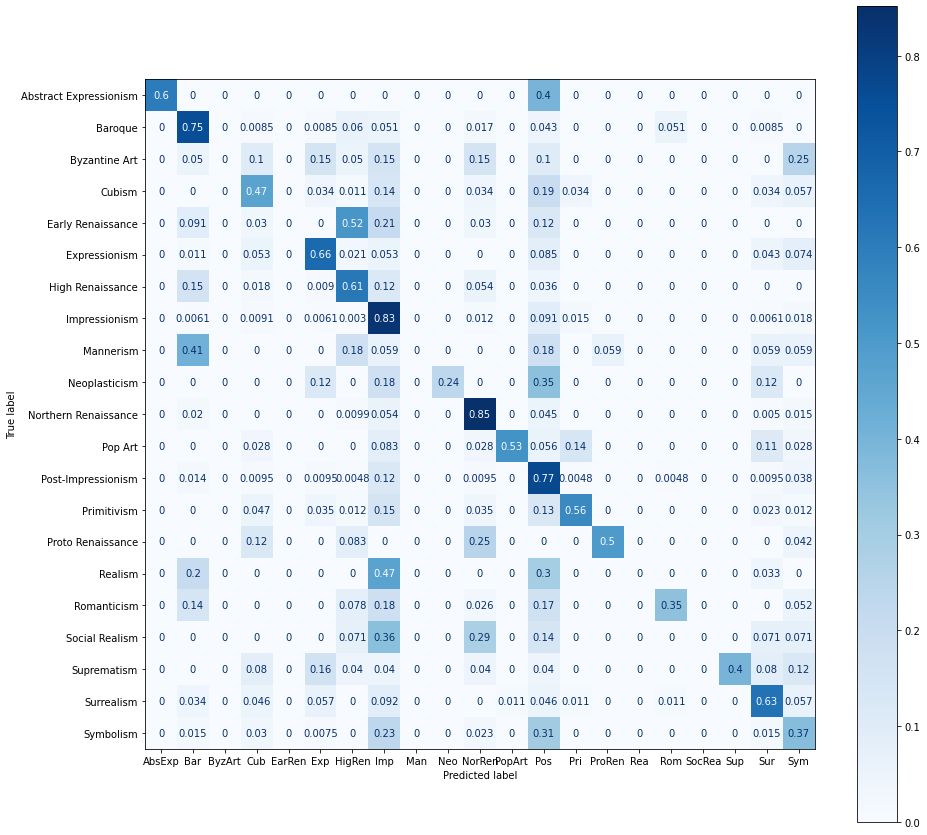

In [ ]:
y_pred = history.model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis = 1)

fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clases,ax=ax, cmap='Blues', normalize="true")
ax.xaxis.set_ticklabels(abr_clases)
plt.show()




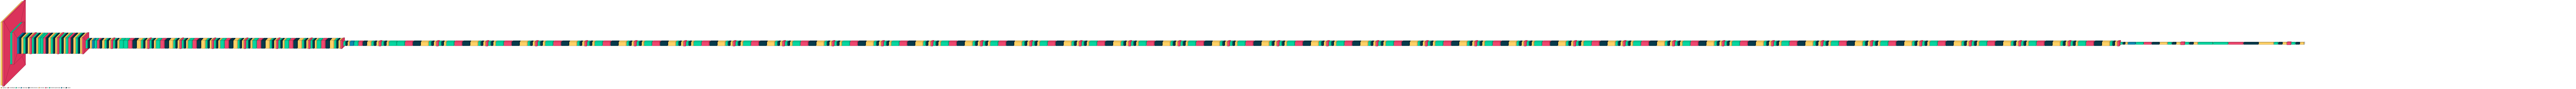

In [ ]:
import visualkeras

visualkeras.layered_view(model,legend=True, to_file='model_winner.png')

Aquí quería crear una visualización de la CNN, esta no fue mi mejor idea...

# An entire trained model from zero to hero

Este solo es un ejercicio para observar el comportamiento de un entrenamiento completo usando la arquitectura ResNet. 

In [ ]:
base_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, 
                                               input_tensor = Input(shape = (224, 224, 3)))

for layer in base_model.layers:
  layer.trainable = True

head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(units = 5000, activation='relu')(head_model)
head_model = Dropout(rate = 0.5)(head_model)
head_model = Dense(units = 3000, activation='relu')(head_model)
head_model = Dropout(rate = 0.5)(head_model)
head_model = Dense(21, activation='softmax')(head_model)

model_new = Model(inputs = base_model.input, outputs = head_model)

early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min', baseline=None, restore_best_weights=False)
callbacks = [early_stopping]

model_new.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

print(model_new.summary())

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
history3 = model_new.fit(train_dataset, epochs=150, validation_data=val_dataset, callbacks=callbacks, class_weight=artists_weight)

Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
351/351 [==============================] - ETA: 0s - loss: 0.1818 - accuracy: 0.2210WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4ecdcec598> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

351/351 [==============================] - 144s 411ms/step - loss: 0.1210 - accuracy: 0.4062 - val_loss: 2.2436 - val_accuracy: 0.3248
Epoch 44/150
351/351 [==============================] - 144s 411ms/step - loss: 0.1207 - accuracy: 0.4105 - val_loss: 2.0047 - val_accuracy: 0.3946
Epoch 45/150
351/351 [==============================] - 144s 411ms/step - loss: 0.1201 - accuracy: 0.4096 - val_loss: 2.2637 - val_accuracy: 0.3383
Epoch 46/150
351/351 [==============================] - 144s 411ms/step - loss: 0.1179 - accuracy: 0.4153 - val_loss: 2.0520 - val_accuracy: 0.4202
Epoch 47/150
351/351 [==============================] - 144s 411ms/step - loss: 0.1176 - accuracy: 0.4198 - val_loss: 3.9617 - val_accuracy: 0.2251
Epoch 48/150
351/351 [==============================] - 144s 411ms/step - loss: 0.1161 - accuracy: 0.4322 - val_loss: 2.1059 - val_accuracy: 0.3818
Epoch 49/150
351/351 [==============================] - 144s 411ms/step - loss: 0.1157 - accuracy: 0.4262 - val_loss: 2.3040 

351/351 [==============================] - 144s 411ms/step - loss: 0.0582 - accuracy: 0.6540 - val_loss: 2.0810 - val_accuracy: 0.4594
Epoch 99/150
351/351 [==============================] - 144s 411ms/step - loss: 0.0572 - accuracy: 0.6568 - val_loss: 2.8507 - val_accuracy: 0.3775
Epoch 100/150
351/351 [==============================] - 144s 411ms/step - loss: 0.0575 - accuracy: 0.6648 - val_loss: 3.1973 - val_accuracy: 0.4088
Epoch 101/150
351/351 [==============================] - 144s 411ms/step - loss: 0.0576 - accuracy: 0.6620 - val_loss: 3.1505 - val_accuracy: 0.3248
Epoch 102/150
351/351 [==============================] - 144s 411ms/step - loss: 0.0562 - accuracy: 0.6652 - val_loss: 1.9264 - val_accuracy: 0.4993
Epoch 103/150
351/351 [==============================] - 145s 411ms/step - loss: 0.0538 - accuracy: 0.6769 - val_loss: 2.7040 - val_accuracy: 0.4081
Epoch 104/150
351/351 [==============================] - 144s 411ms/step - loss: 0.0527 - accuracy: 0.6768 - val_loss: 2.

Text(0.5, 1.0, 'Accuracy through Epochs')

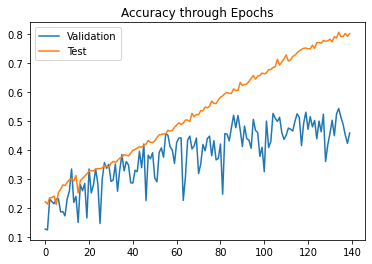

In [ ]:


y11 = history3.history["val_accuracy"]
y12 = history3.history["accuracy"]
x1 = range(len(y11))

plt.plot(x1, y11)
plt.plot(x1, y12)

plt.legend(["Validation", "Test"])
plt.title("Accuracy through Epochs")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


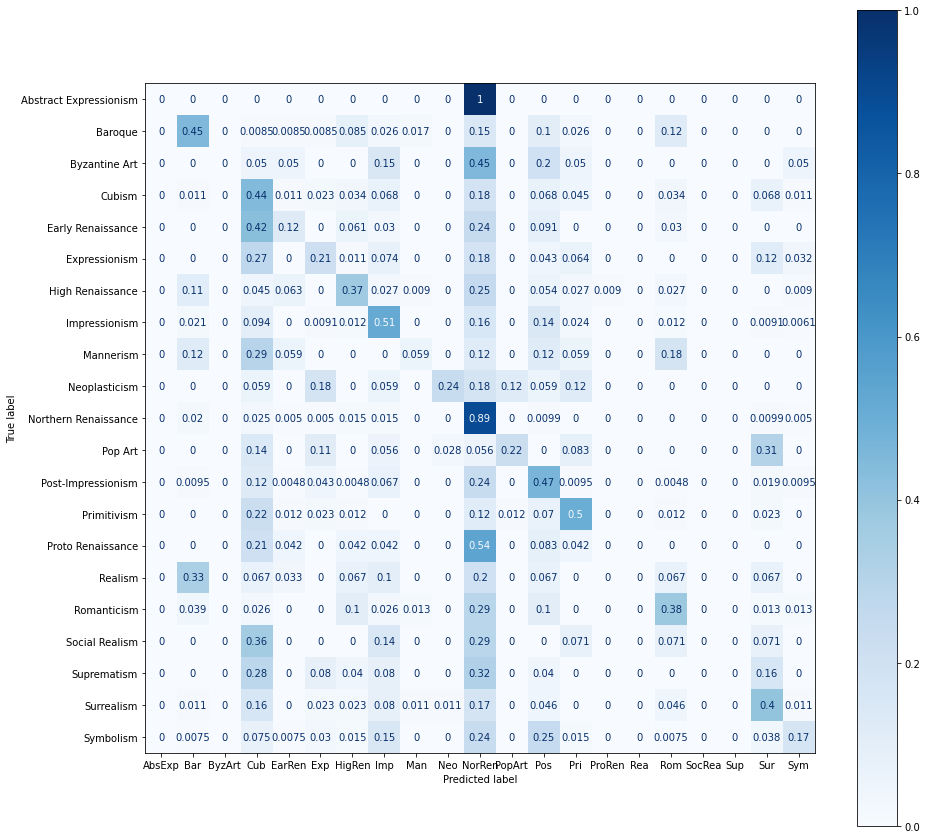

In [ ]:
y_pred = history3.model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis = 1)

fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clases,ax=ax, cmap='Blues', normalize="true")
ax.xaxis.set_ticklabels(abr_clases)
plt.show()




Acá se ven algunas de las predicciones hechas, por el modelo que tuvo mejor accuracy de validación.

----------------------------------------


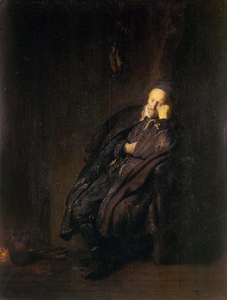

Rembrandt_53.jpg
	Real: 		Baroque 
	Predicha:	Baroque
----------------------------------------


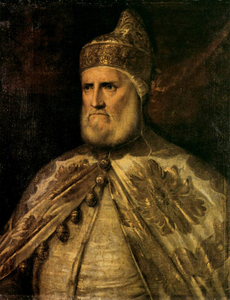

Titian_83.jpg
	Real: 		High Renaissance 
	Predicha:	High Renaissance
----------------------------------------


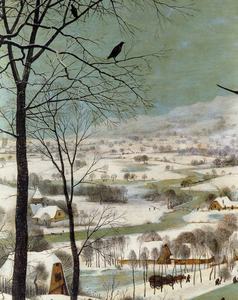

Pieter_Bruegel_133.jpg
	Real: 		Northern Renaissance 
	Predicha:	Northern Renaissance
----------------------------------------


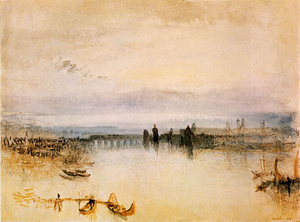

William_Turner_7.jpg
	Real: 		Romanticism 
	Predicha:	Symbolism
----------------------------------------


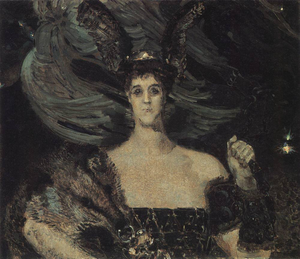

Mikhail_Vrubel_98.jpg
	Real: 		Symbolism 
	Predicha:	Post-Impressionism
----------------------------------------


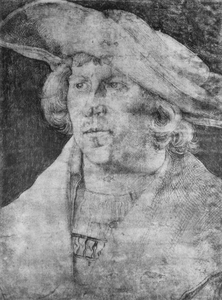

Albrecht_Dürer_175.jpg
	Real: 		Northern Renaissance 
	Predicha:	Northern Renaissance
----------------------------------------


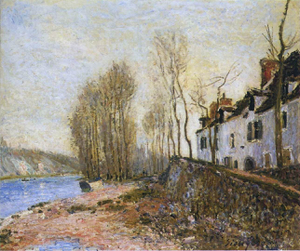

Alfred_Sisley_143.jpg
	Real: 		Impressionism 
	Predicha:	Impressionism
----------------------------------------


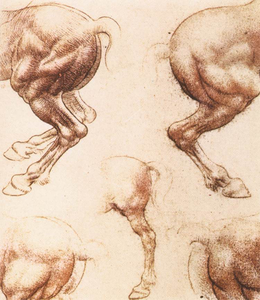

Leonardo_da_Vinci_91.jpg
	Real: 		High Renaissance 
	Predicha:	High Renaissance
----------------------------------------


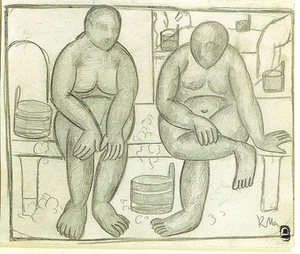

Kazimir_Malevich_2.jpg
	Real: 		Suprematism 
	Predicha:	Northern Renaissance
----------------------------------------


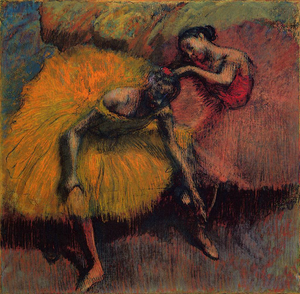

Edgar_Degas_507.jpg
	Real: 		Impressionism 
	Predicha:	Impressionism


In [ ]:
for _ in range(10):
    i = random.randint(1, len(y_test))
    path = test_dataset.filepaths[i]
    gtru = y_test[i]
    pred = y_pred[i]
    img = Image.open(path)
    img.thumbnail((300,300),Image.ANTIALIAS)
    print("-"*40)
    display(img)
    print(f"{os.path.basename(path)}")
    print(f"\tReal: \t\t{clases[gtru]} \n\tPredicha:\t{clases[pred]}")
    
    

